In [111]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
Data= pd.read_csv("co2_emissions.csv",sep=";")
Data.head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [113]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [114]:
print(Data['make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [115]:
print(Data['model'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [116]:
Data['transmission'] = np.where(Data['transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['M5','M6','M7']),'Manual',Data['transmission'])

print(Data['transmission'].unique())

['AS' 'M' 'CVT' 'AM' 'A']


In [117]:

print(Data['fuel_type'].value_counts())

Data['fuel_type']= np.where(Data['fuel_type']=='R','Regular gasoline',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='P','Premium gasoline',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='E','Ethanol',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='D','Diesel',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='N','Natural gas',Data['fuel_type'])

print(Data['fuel_type'].unique())

fuel_type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64
['Z' 'Diesel' 'X' 'Ethanol' 'Natural gas']


In [118]:
print(Data['vehicle_class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [119]:
Data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [120]:
Data.shape

(7385, 12)

In [121]:
Data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [122]:
Data.isnull().sum()
# No Null values

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [123]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


# Visualisation

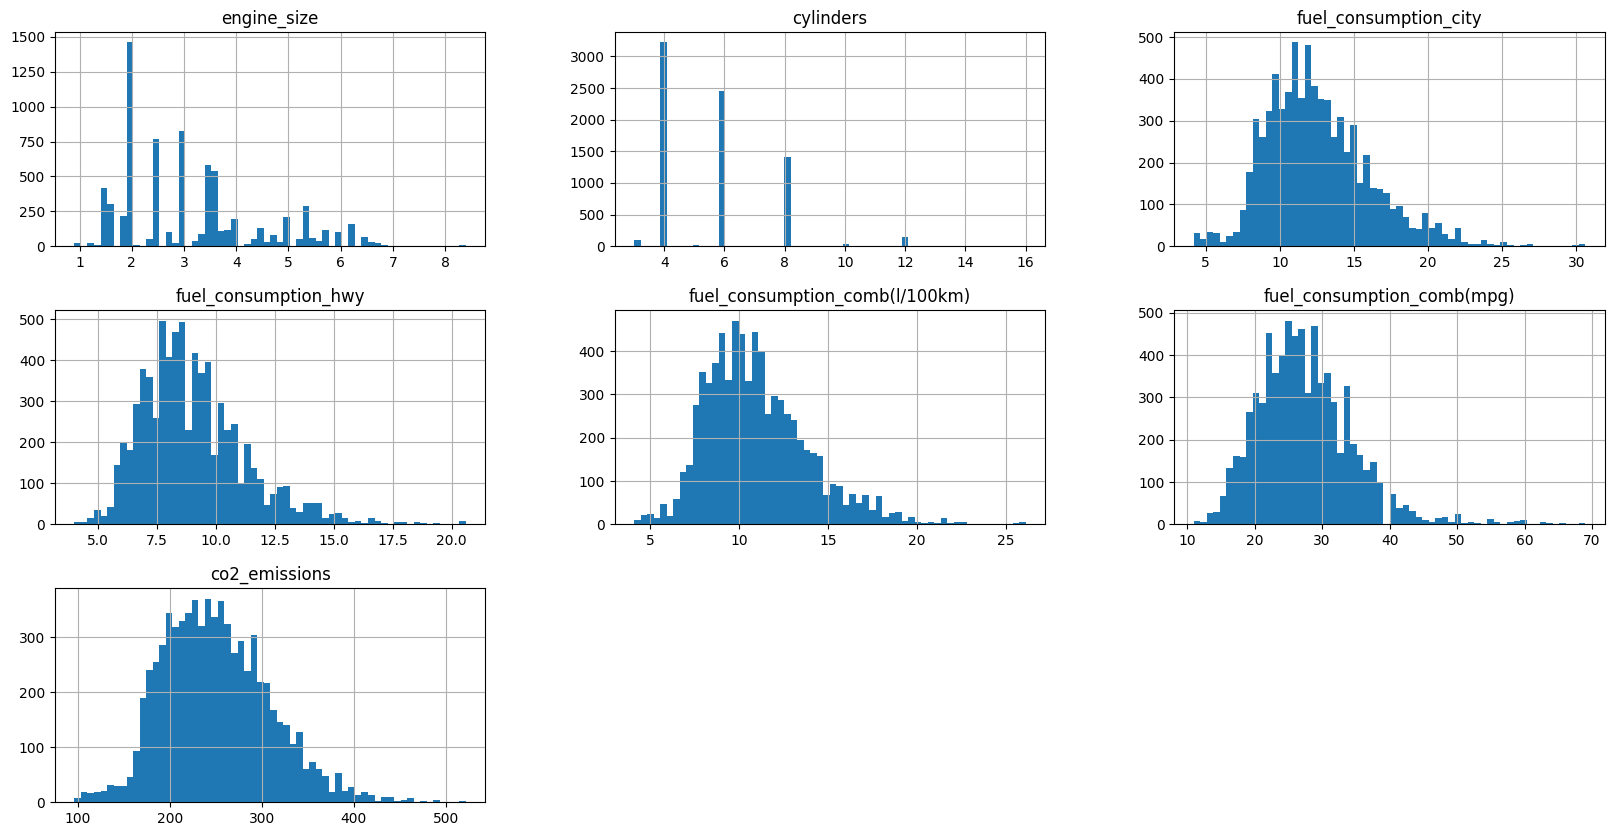

In [124]:
# Histo
Data.hist(figsize=(20,10),bins=60)
plt.show()

### Heatmap

In [ ]:
corr = Data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [ ]:
Data.corr()

### FREQUENCY DISTRIBUTION

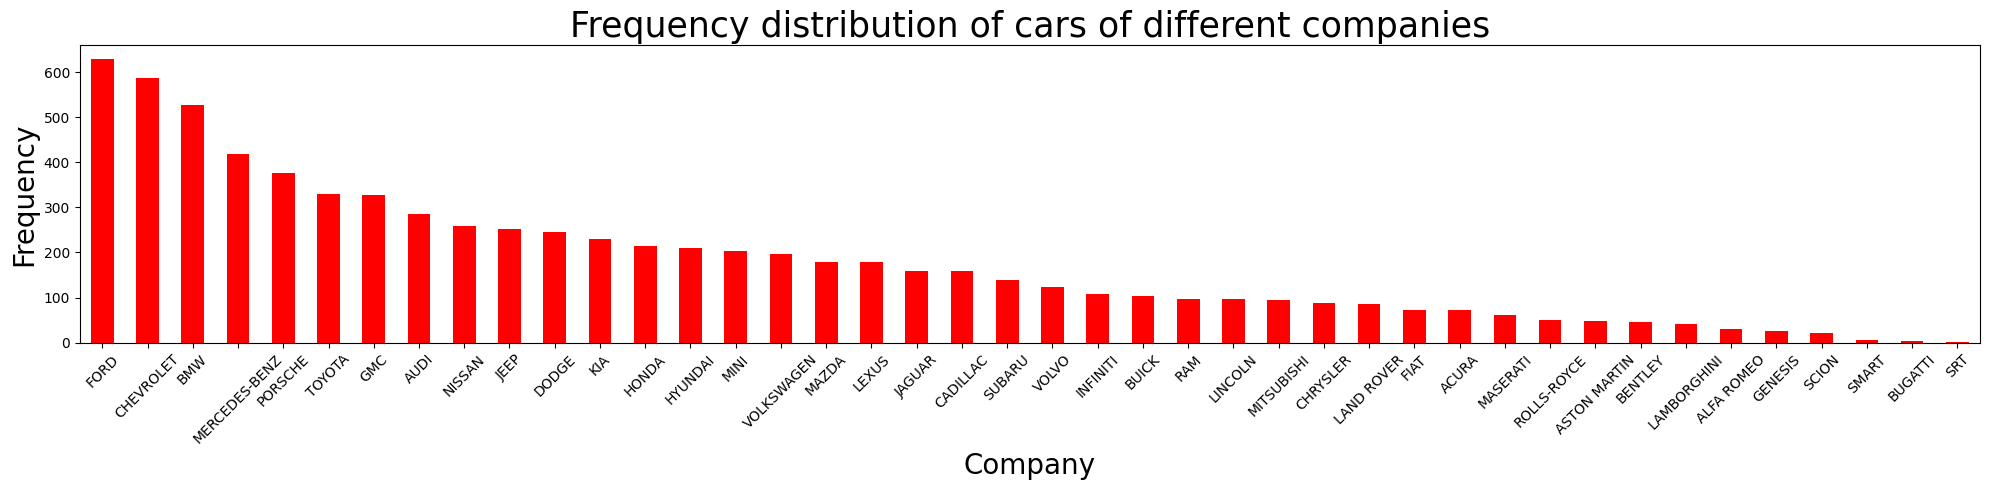

In [128]:
# Make
plt.figure(figsize=(20,5))

Data.groupby('make')['make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

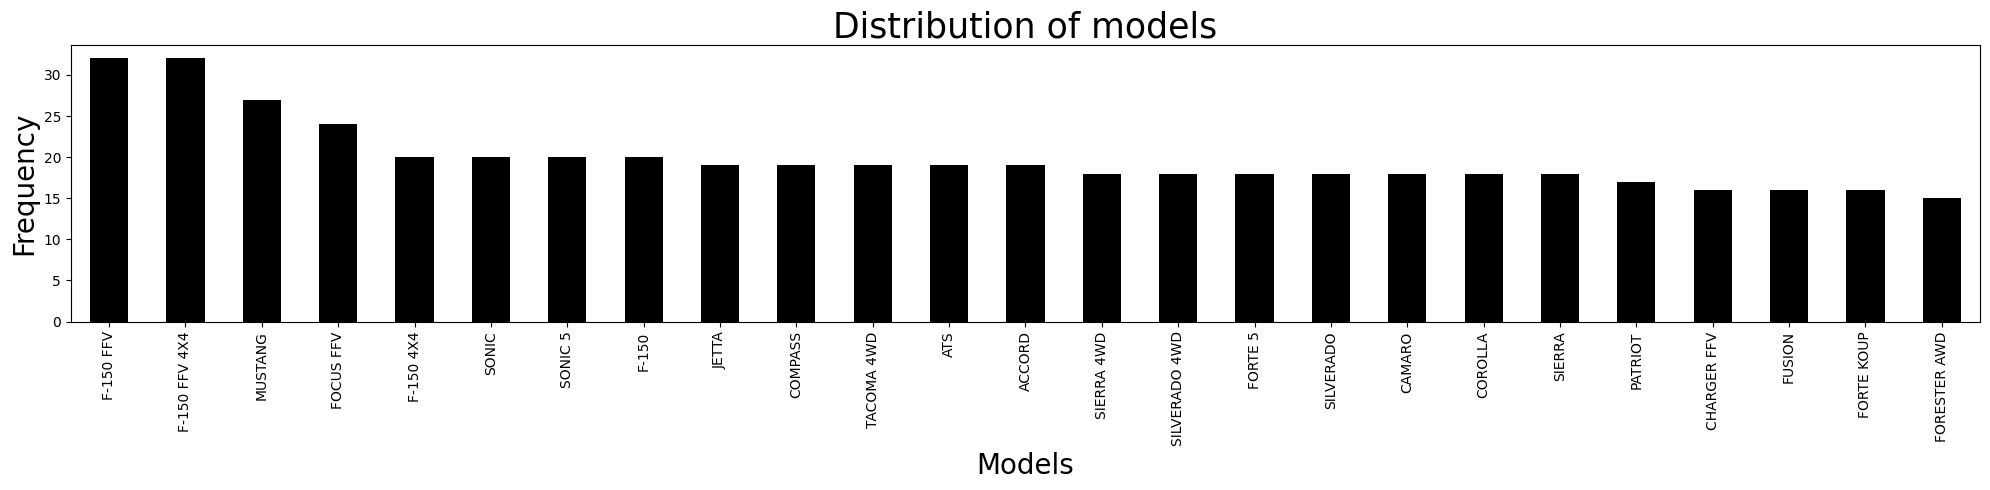

In [129]:
# Model
plt.figure(figsize=(20,5))

Data.groupby('model')['model'].count().sort_values(ascending=False)[:25].plot(kind='bar',color = 'black')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

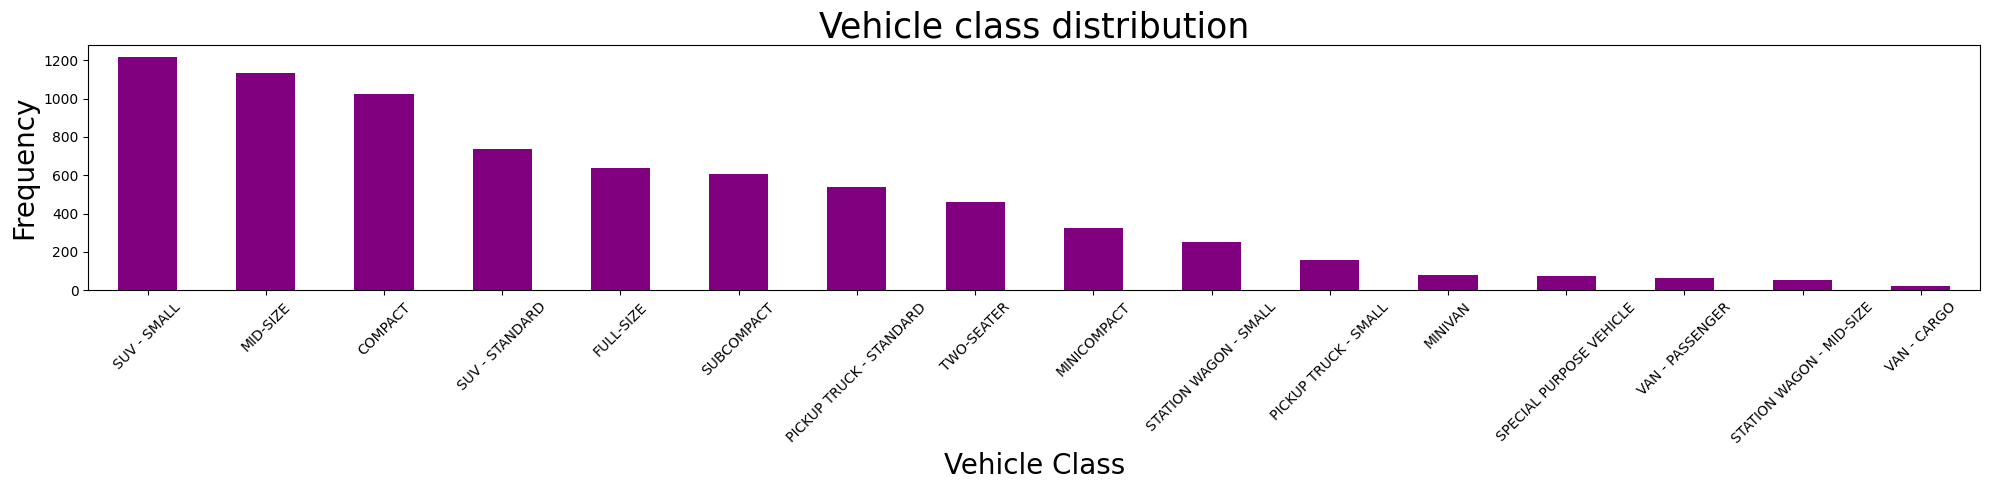

In [130]:
# Vehicle Class

plt.figure(figsize=(20,5))

Data.groupby('vehicle_class')['vehicle_class'].count().sort_values(ascending=False).plot(kind='bar', color='Purple')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

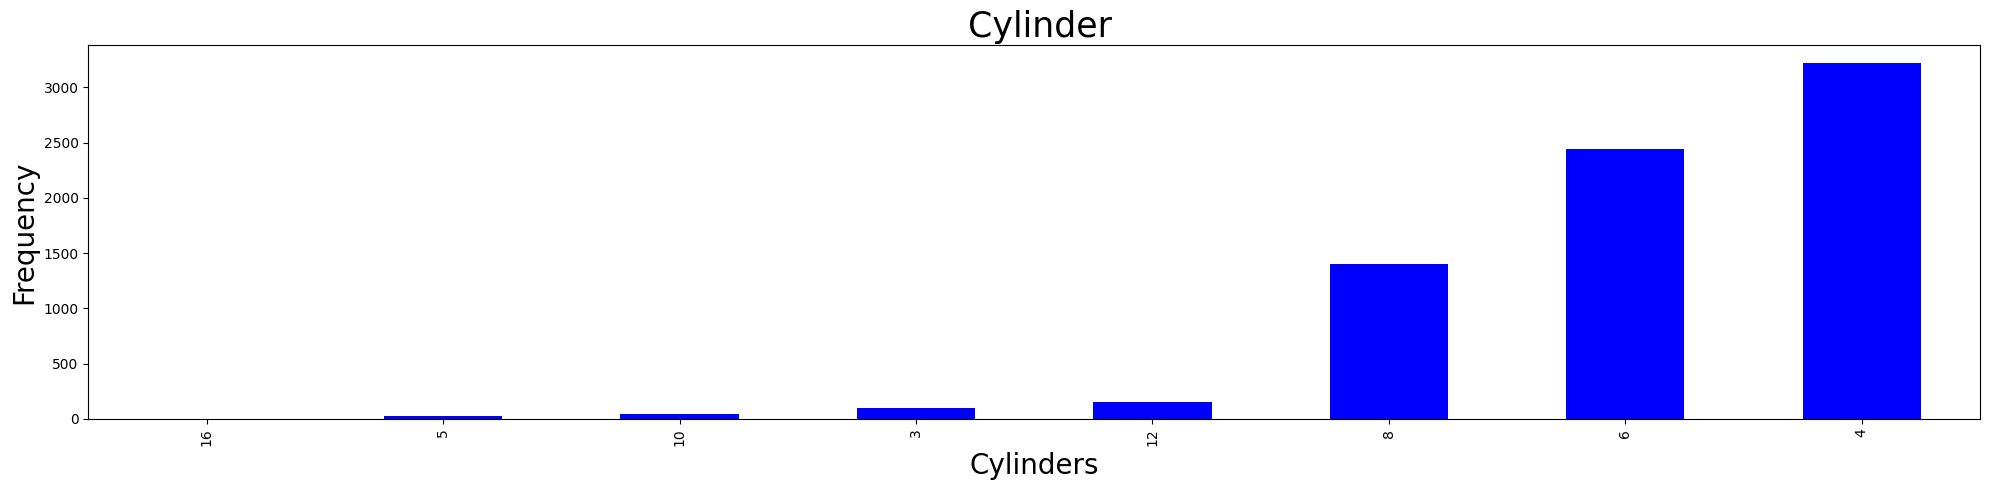

In [131]:
# Cylinders

plt.figure(figsize=(20,5))

Data.groupby('cylinders')['cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='Blue')

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

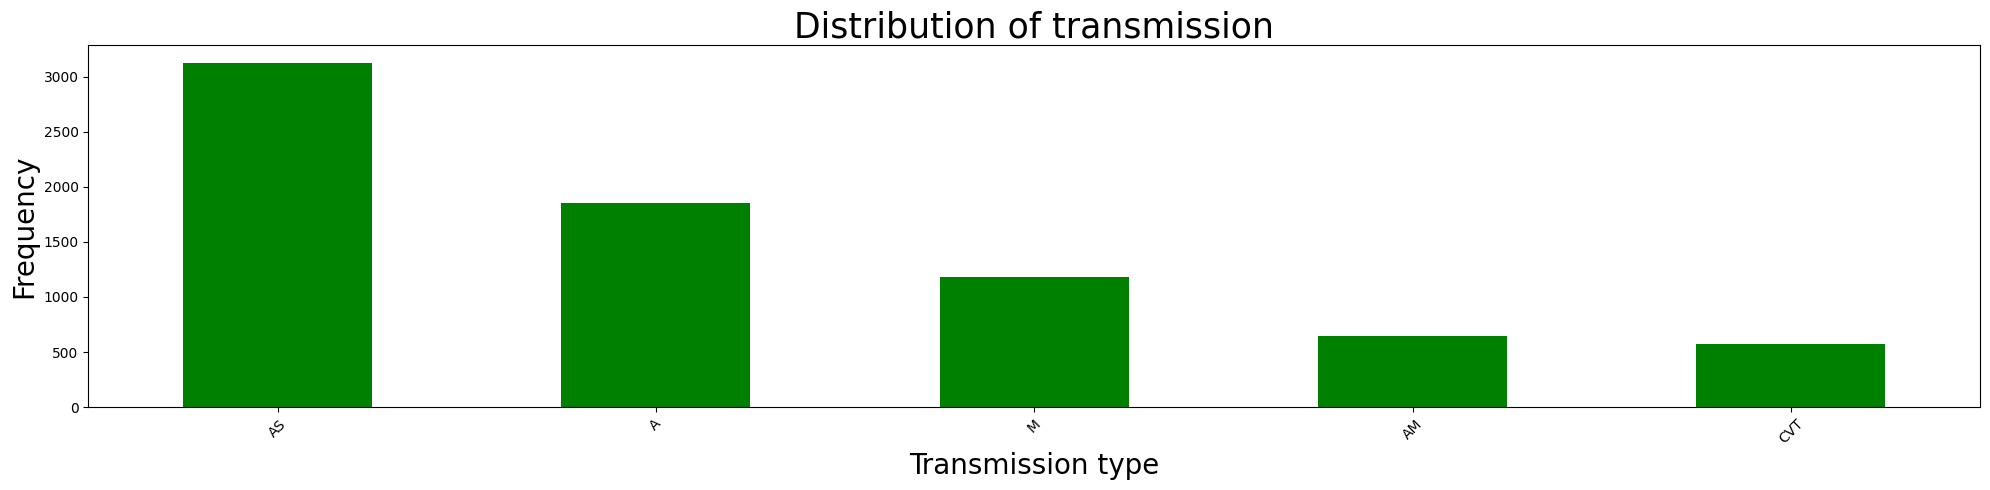

In [132]:
# Transmission

plt.figure(figsize=(20,5))

Data.groupby('transmission')['transmission'].count().sort_values(ascending=False).plot(kind='bar', color='Green')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

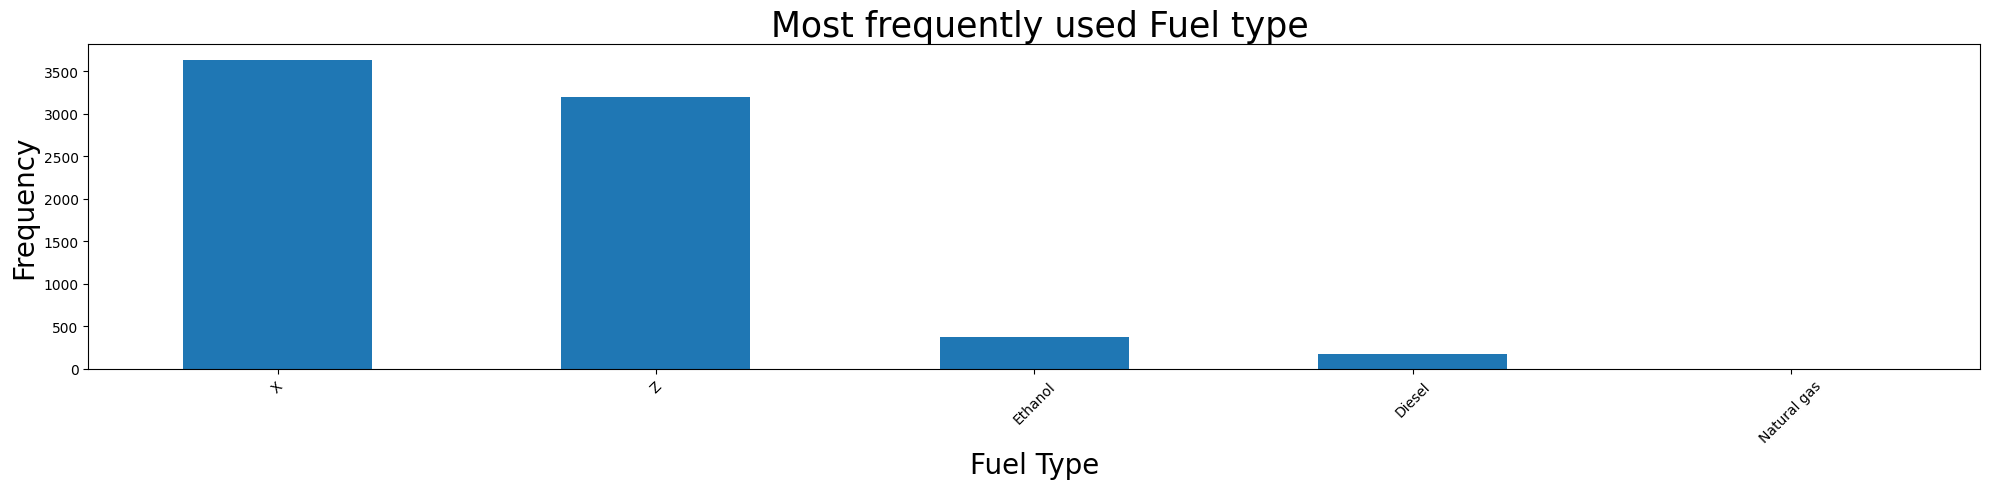

In [133]:
# Fuel Type

plt.figure(figsize=(20,5))

Data.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

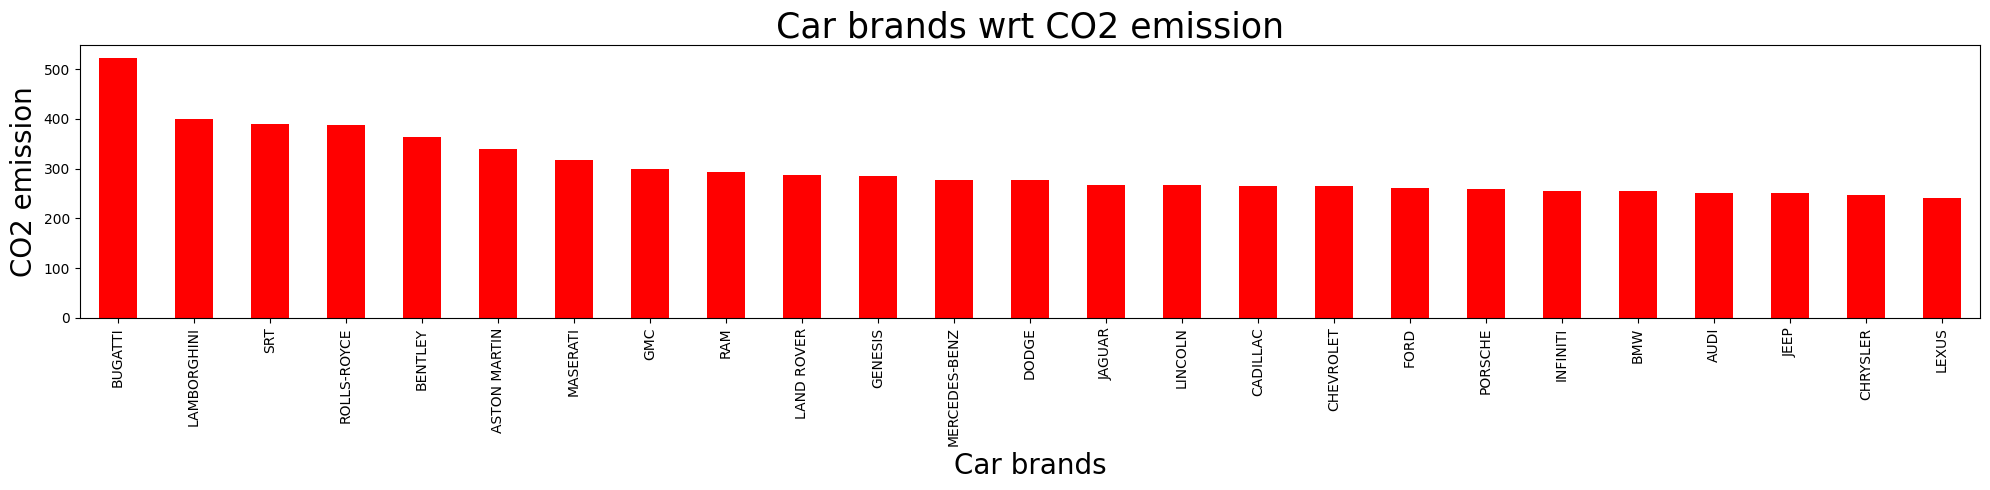

In [134]:
#  CO2 emision

plt.figure(figsize=(20,5))

Data.groupby('make')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

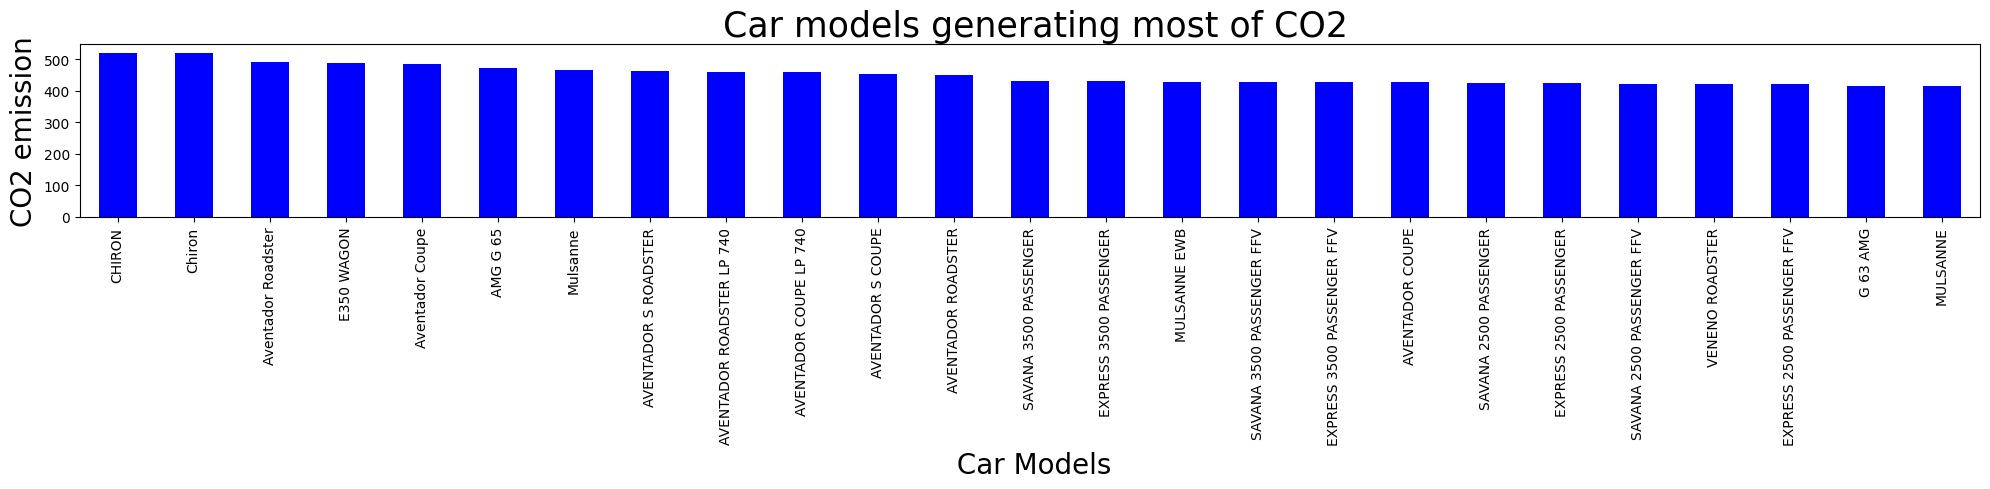

In [135]:
plt.figure(figsize=(20,5))

Data.groupby('model')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

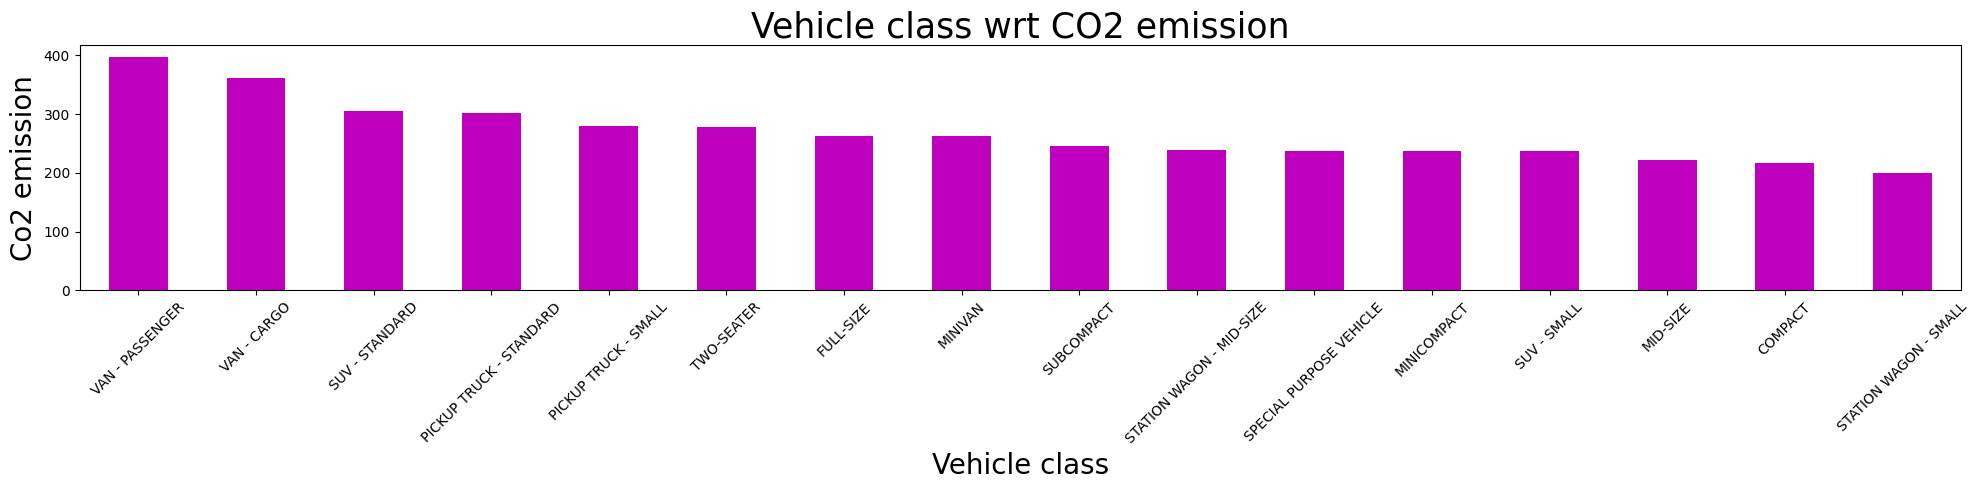

In [136]:
plt.figure(figsize=(20,5))

Data.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='m')

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

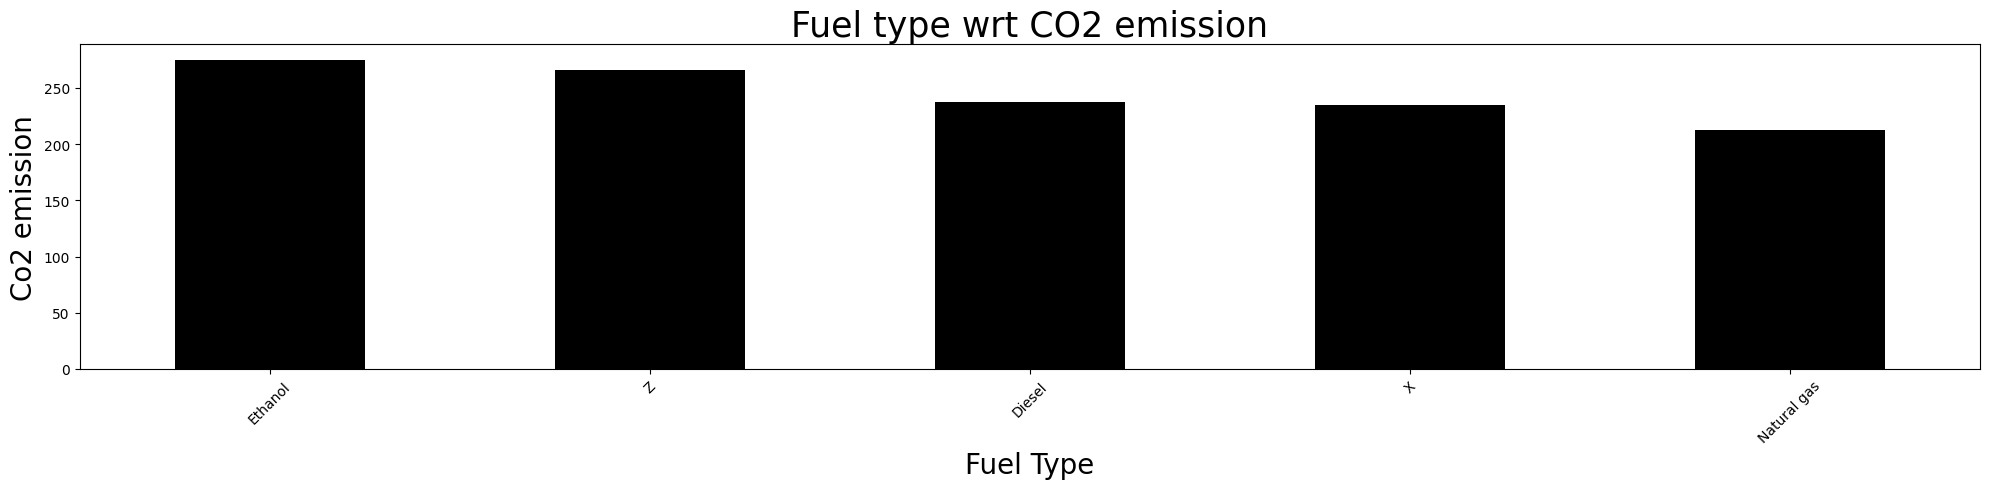

In [137]:
plt.figure(figsize=(20,5))

Data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='black')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

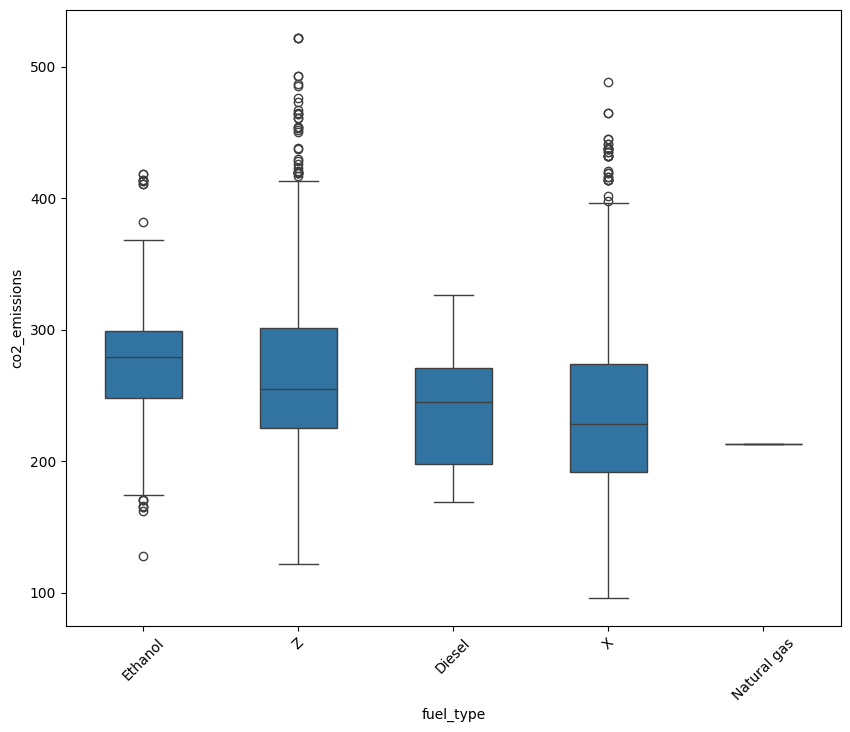

In [138]:
# Boxplot
fuel_type = Data.groupby('fuel_type')['co2_emissions'].median().sort_values(ascending=False).index
plt.figure(figsize=(10,8))
sns.boxplot(x = 'fuel_type', y='co2_emissions', data =Data, order=fuel_type, width=0.5)
plt.xticks(rotation=45, horizontalalignment='center')

plt.show()

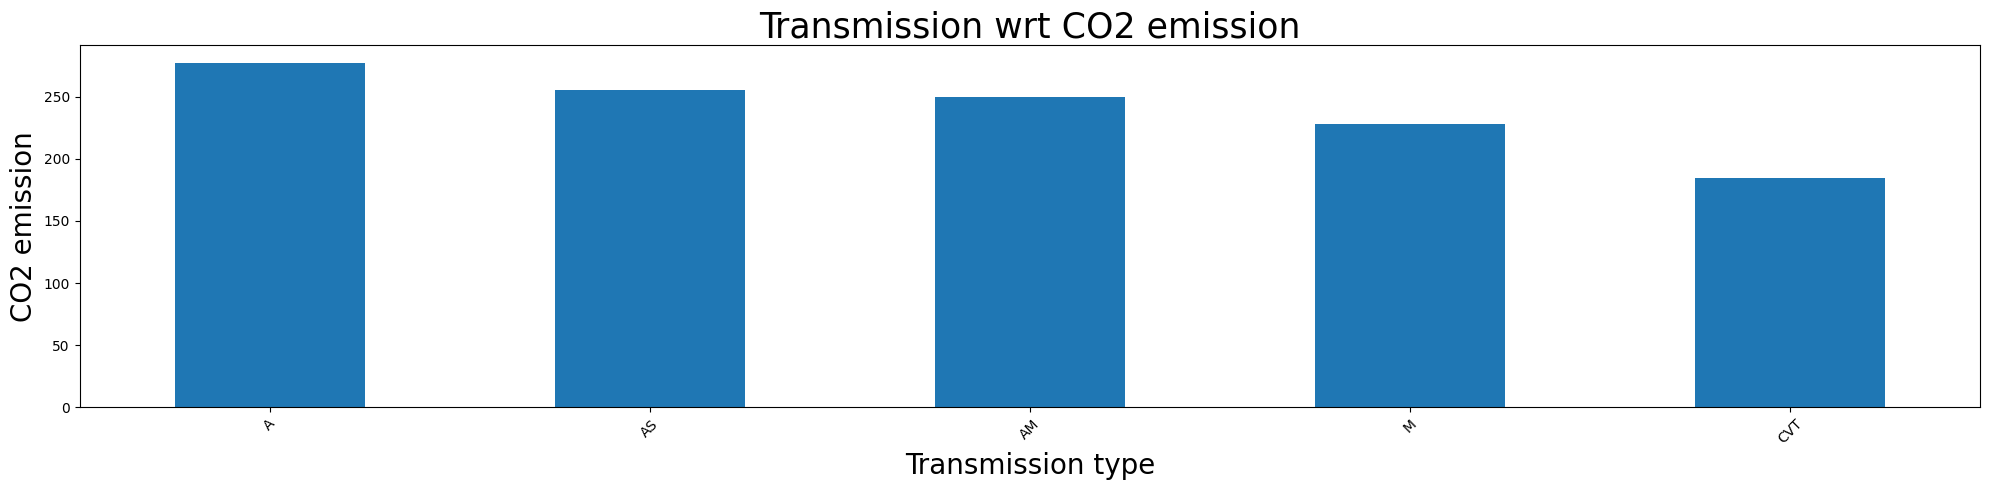

In [139]:
plt.figure(figsize=(20,5))

Data.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

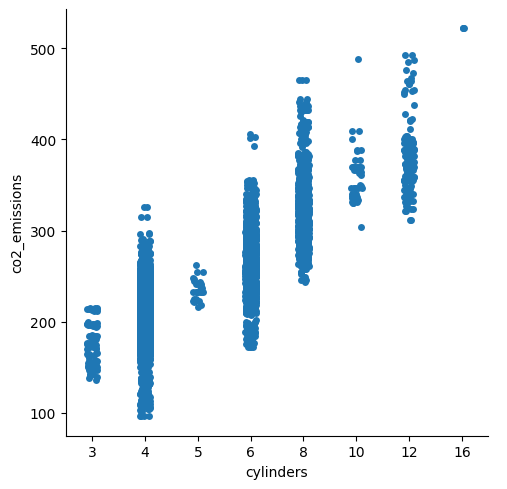

In [140]:
# Co2 emission wrt no of cylinders
plt.figure(figsize=(10,8))

sns.catplot(x='cylinders', y='co2_emissions',data = Data)

plt.show()                              

In [141]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [144]:
Data_v =pd.get_dummies(Data['fuel_type'], prefix='Fuel', drop_first=True)
Data.v = pd.get_dummies(Data["transmission"], drop_first=True)
Data_v.head()

,Fuel_Ethanol,Fuel_Natural gas,Fuel_X,Fuel_Z
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [145]:
Data.v.head()

,AM,AS,CVT,M
0,False,True,False,False
1,False,False,False,True
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


In [146]:
df = [Data, Data_v]

data = pd.concat(df, axis=1)
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Fuel_Ethanol,Fuel_Natural gas,Fuel_X,Fuel_Z
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,False,False,False,True
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,False,False,False,True
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Z,6.0,5.8,5.9,48,136,False,False,False,True
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,False,False,False,True
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,False,False,False,True


In [147]:
data.drop(['fuel_type'], inplace=True, axis=1)
data.drop(['transmission'], inplace=True, axis=1)

### HANDLING OTHER CATAGORICAL FEATURES HAVING MULTIPLE CATAGORIES (MAKE , MODEL, VEHICLE CLASS)

In [149]:
df_freq = data['make'].value_counts().to_dict()
mod_freq = data['model'].value_counts().to_dict()
veh_freq = data['vehicle_class'].value_counts().to_dict()

In [150]:
data['make'] = data['make']. map(df_freq)
data['model'] = data['model']. map(mod_freq)
data['vehicle_class'] = data['vehicle_class']. map(veh_freq)

### DIVIDING DATA SET INTO INDEPENDENT AND DEPENDENT VARIABLE

In [153]:
A = data.drop('co2_emissions', axis=1)
B = data['co2_emissions']

### FEATURE SELECTION USING CHI-SQUARE TEST

In [154]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [156]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(A, B)

In [157]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = A.columns

In [158]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

### FEATURE SCALING USING STANDARDIZATION

In [163]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [164]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [169]:
y_pred = model.predict(X_test)
y_pred

array([254.93941234, 339.96157113, 324.60632169, ..., 182.58434154,
       239.90453503, 192.36718579])

In [170]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

5.882255219914945

In [171]:
r2_score(y_test, y_pred)

0.9899405016002558

In [172]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [173]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

,pred_values,real_values
0,254.94,253.0
1,339.96,344.0
2,324.61,322.0
3,297.34,297.0
4,306.86,308.0
...,...,...
1472,220.87,221.0
1473,262.01,260.0
1474,182.58,184.0
1475,239.90,235.0


In [174]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  3.1450101557210566


/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/354425735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


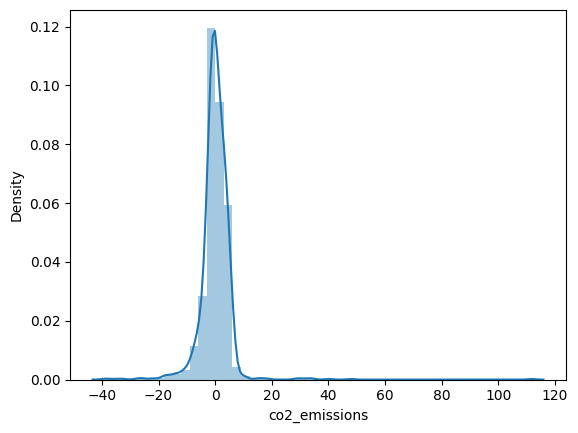

In [176]:
sns.distplot(y_pred-y_test)
plt.show()

Text(0, 0.5, 'y_pred')

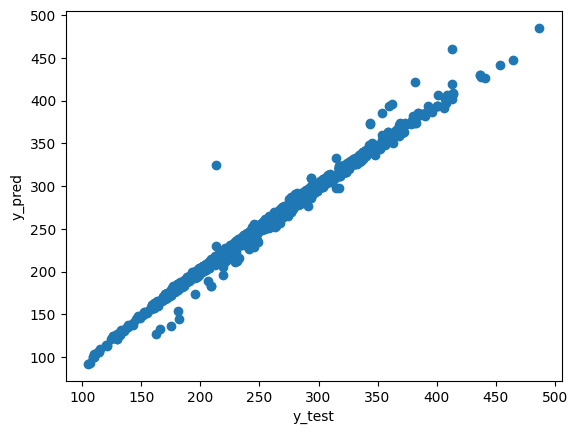

In [177]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')


/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/4278946137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, bins=20,color='grey')


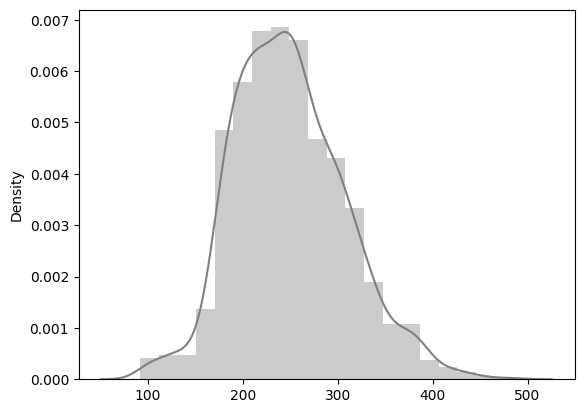

In [178]:
sns.distplot(y_pred, bins=20,color='grey')
plt.show()



/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/1147941242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['co2_emissions'], bins=20)


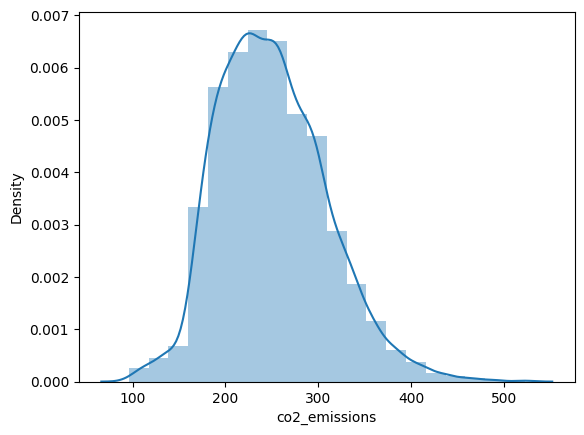

In [179]:
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [180]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [181]:
model.coef_

array([ 6.49761795e-03, -9.30878409e-02, -2.95710663e-02,  3.32040658e-01,
        2.24561184e+00,  3.30143626e+01,  1.74983703e+01,  7.14541294e+00,
       -6.31893353e+00, -2.85879929e+01,  0.00000000e+00, -1.23305354e+01,
       -1.25089205e+01])

In [182]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([254.89211985, 339.84586314, 324.63675556, ..., 182.98151941,
       240.37614905, 193.02068538])

In [183]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

5.858352088833693

In [184]:
r2_score(y_lasso_pred, y_test)

0.9899848778029803

In [185]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred



,0,1
0,254.892120,253.0
1,339.845863,344.0
2,324.636756,322.0
3,297.191609,297.0
4,306.619266,308.0
...,...,...
1472,220.808593,221.0
1473,261.863139,260.0
1474,182.981519,184.0
1475,240.376149,235.0


In [186]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  3.233608666215302


In [187]:
lasso_pred.head(10)

,pred_values,real_values,diff
0,254.89,253.0,1.89
1,339.85,344.0,4.15
2,324.64,322.0,2.64
3,297.19,297.0,0.19
4,306.62,308.0,1.38
5,390.13,406.0,15.87
6,244.08,242.0,2.08
7,217.07,216.0,1.07
8,244.67,246.0,1.33
9,227.50,223.0,4.50


/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/287112299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_lasso_pred-y_test)


<Axes: xlabel='co2_emissions', ylabel='Density'>

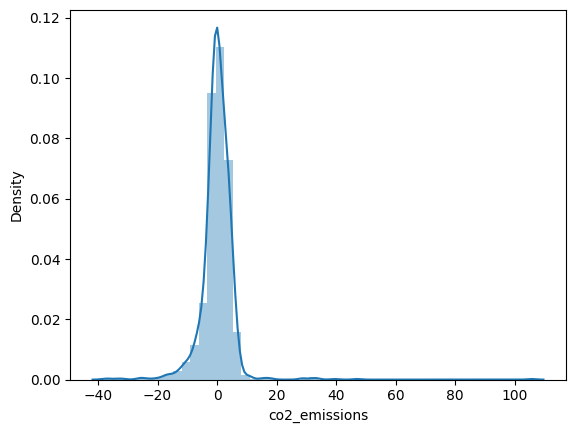

In [188]:
sns.distplot(y_lasso_pred-y_test)

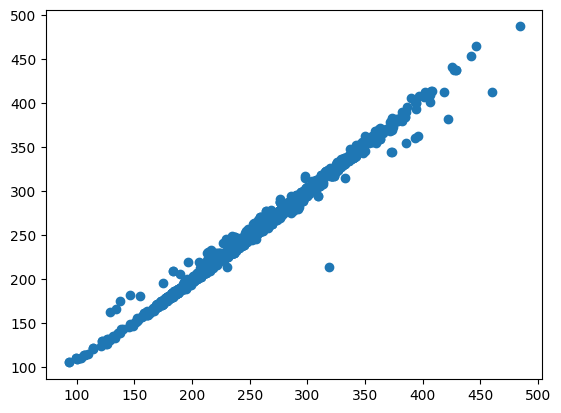

In [189]:
plt.scatter(y_lasso_pred, y_test)

/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/3066171050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_lasso_pred, bins=20,color='red')


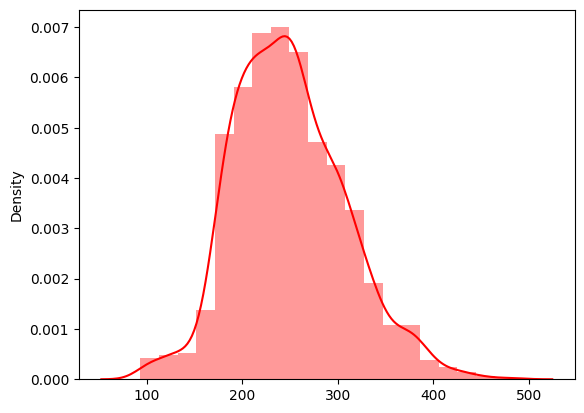

In [190]:
sns.distplot(y_lasso_pred, bins=20,color='red')
plt.show()

/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/1147941242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['co2_emissions'], bins=20)


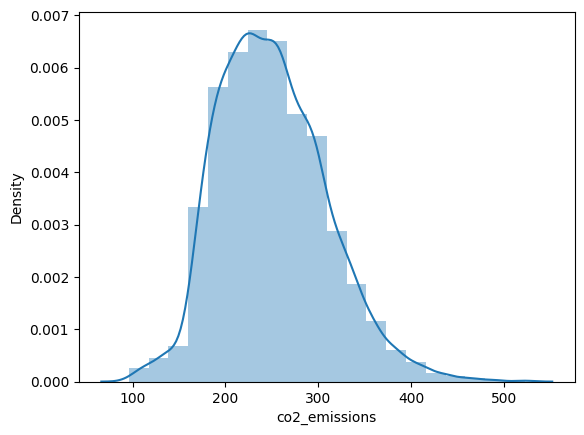

In [191]:
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [192]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [193]:
model.intercept_

250.93957345971563

In [194]:
model.coef_

array([  0.06246309,  -0.15350818,  -0.0448453 ,   0.24043812,
         2.15701802,  23.6023465 ,  12.63147883,  21.76380604,
        -6.27404722, -30.08702039,   0.        , -15.13671548,
       -15.36610557])

In [195]:
y_ridge = model.predict(X_test)
y_ridge

array([254.939692  , 339.96022732, 324.60671666, ..., 182.58482649,
       239.9076758 , 192.36955617])

In [196]:
np.sqrt(mean_squared_error(y_ridge,y_test))

5.881846323893509

In [197]:
r2_score(y_test,y_ridge)

0.9899419000930975

In [198]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

,0,1
0,254.939692,253.0
1,339.960227,344.0
2,324.606717,322.0
3,297.337874,297.0
4,306.859624,308.0
...,...,...
1472,220.864133,221.0
1473,262.004967,260.0
1474,182.584826,184.0
1475,239.907676,235.0


In [199]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

ridge_pred.head(10)

mean diff:  3.1454840893703455


,pred_values,real_values,diff
0,254.94,253.0,1.94
1,339.96,344.0,4.04
2,324.61,322.0,2.61
3,297.34,297.0,0.34
4,306.86,308.0,1.14
5,391.26,406.0,14.74
6,243.97,242.0,1.97
7,216.88,216.0,0.88
8,244.58,246.0,1.42
9,227.06,223.0,4.06


/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/2207294210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_ridge)


<Axes: xlabel='co2_emissions', ylabel='Density'>

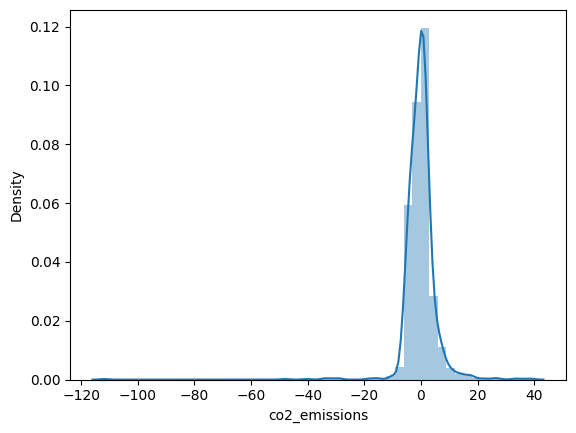

In [200]:
sns.distplot(y_test-y_ridge)

/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/1804322568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_ridge, bins=20,color='red')


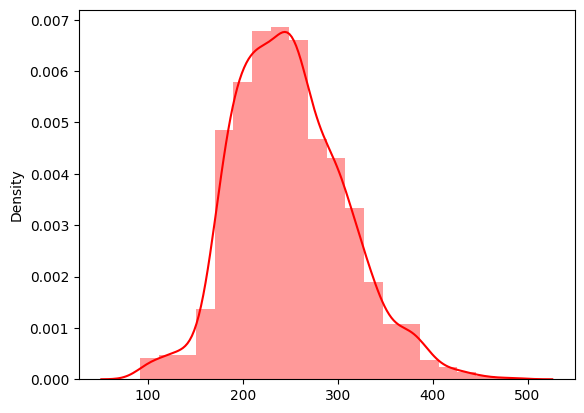

In [201]:
sns.distplot(y_ridge, bins=20,color='red')
plt.show()


/var/folders/d6/whjrq6gj2f50mbrt0cwrr8700000gn/T/ipykernel_17067/1147941242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['co2_emissions'], bins=20)


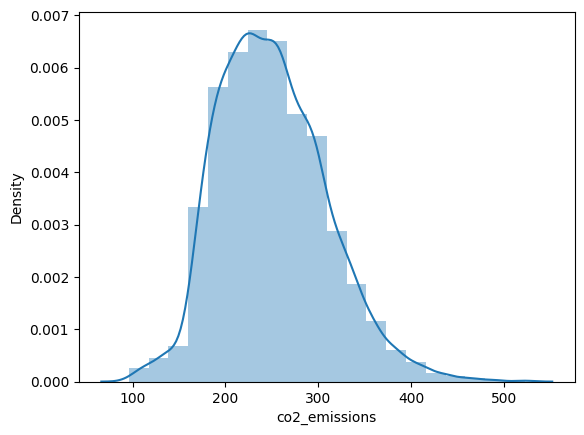

In [202]:
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [203]:
# DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [204]:
dtr_pred = model.predict(X_test)
dtr_pred

array([253., 344., 327., ..., 184., 240., 194.])

In [205]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

4.760594091045948

In [206]:
r2_score(y_test, dtr_pred)

0.993411130518398

In [207]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,253.0,253.0
1,344.0,344.0
2,327.0,322.0
3,295.0,297.0
4,308.0,308.0


In [208]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

dtr_pred.head(10)

mean diff:  1.9705280974949224


,pred_values,real_values,diff
0,253.0,253.0,0.0
1,344.0,344.0,0.0
2,327.0,322.0,5.0
3,295.0,297.0,2.0
4,308.0,308.0,0.0
5,402.5,406.0,3.5
6,242.0,242.0,0.0
7,216.0,216.0,0.0
8,246.0,246.0,0.0
9,228.0,223.0,5.0


In [209]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [210]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([252.72      , 342.98971429, 325.4575    , ..., 183.38      ,
       238.49      , 191.99083333])

In [211]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 4.1622
MAE: 2.0998
R2_score: 0.9950


In [212]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,252.720000,253.0
1,342.989714,344.0
2,325.457500,322.0
3,295.350111,297.0
4,308.160000,308.0


In [213]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  2.0997765741367638


In [214]:
y_rf_pred.head(10)

,pred_values,real_values,diff
0,252.72,253.0,0.28
1,342.99,344.0,1.01
2,325.46,322.0,3.46
3,295.35,297.0,1.65
4,308.16,308.0,0.16
5,401.74,406.0,4.26
6,242.08,242.0,0.08
7,216.27,216.0,0.27
8,245.96,246.0,0.04
9,226.73,223.0,3.73


In [215]:
# SIMPLE VECTOR MACHINE

In [216]:

from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([254.55277145, 342.97963435, 326.54902346, ..., 182.2966162 ,
       239.13607677, 191.95811445])

In [217]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

6.3243833679435975

In [218]:
r2_score(y_svr_pred,y_test)

0.9888467477945678

In [219]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,254.552771,253.0
1,342.979634,344.0
2,326.549023,322.0
3,297.263799,297.0
4,309.119603,308.0


In [220]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

y_svr_pred.head(10)

mean diff:  2.9531144211239


,pred_values,real_values,diff
0,254.55,253.0,1.55
1,342.98,344.0,1.02
2,326.55,322.0,4.55
3,297.26,297.0,0.26
4,309.12,308.0,1.12
5,400.07,406.0,5.93
6,242.88,242.0,0.88
7,216.59,216.0,0.59
8,245.40,246.0,0.60
9,227.10,223.0,4.10


In [221]:
# APPROACH 2

In [222]:
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Simple Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### OVERALL PERFORMANCE OF ALL MODELS IN A DATAFRAME

In [223]:
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,4.921905,2.953900,0.992914,5.882255,3.145099,0.989941
1,Lasso Regression,5.003416,3.031355,0.992677,5.858352,3.233612,0.990022
2,Ridge Regression,4.921907,2.954186,0.992914,5.881846,3.145376,0.989942
3,Decision Tree Regression,0.962878,0.327671,0.999729,4.815329,1.992218,0.993259
4,Random Forest Regression,1.441085,0.864129,0.999393,4.121792,2.098485,0.995061
5,Simple Vector Regression,5.319272,2.700022,0.991723,6.319222,2.948609,0.988390


## Overall Decision Tree Regression model given the best results.